In [13]:
library(bio3d)
library(igraph)

In [14]:
#load the average mutual info matrix
cij <- as.matrix(read.table("mutual_info_avg.txt", sep=" "))
dim(cij)[1] == dim(cij)[2]
dim(cij)

[1] TRUE

[1] 629 629

In [15]:
cij

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V620,V621,V622,V623,V624,V625,V626,V627,V628,V629
1.0000000,0.9710127,0.9343365,0.8825184,0.8420543,0.7567794,0.7169274,0.6655927,0.6355194,0.6438140,⋯,0.4515860,0.4846675,0.5132643,0.5127975,0.5144654,0.5129769,0.4919298,0.4716508,0.4416263,0.3801502
0.9710127,1.0000000,0.9797001,0.9311944,0.8813520,0.8024871,0.7579872,0.7105218,0.6646709,0.6805943,⋯,0.4721100,0.5032883,0.5301151,0.5287334,0.5343272,0.5321346,0.5160703,0.4940625,0.4551102,0.3810677
0.9343365,0.9797001,1.0000000,0.9752547,0.9236991,0.8554750,0.8091021,0.7491728,0.7030663,0.7213488,⋯,0.4912503,0.5258853,0.5542639,0.5574101,0.5641205,0.5616212,0.5454694,0.5233863,0.4803000,0.4043148
0.8825184,0.9311944,0.9752547,1.0000000,0.9627590,0.9006824,0.8639298,0.7919216,0.7487581,0.7505608,⋯,0.4723916,0.5088106,0.5322934,0.5378107,0.5499906,0.5488591,0.5371065,0.5188324,0.4773253,0.4049472
0.8420543,0.8813520,0.9236991,0.9627590,1.0000000,0.9657001,0.9138978,0.8453865,0.7726388,0.7565380,⋯,0.4795347,0.5145296,0.5370629,0.5430413,0.5590095,0.5586658,0.5502674,0.5288851,0.4799985,0.3954173
0.7567794,0.8024871,0.8554750,0.9006824,0.9657001,1.0000000,0.9612091,0.8903171,0.8374381,0.8049682,⋯,0.4577478,0.4842792,0.4991680,0.4994533,0.5127192,0.5142087,0.5126139,0.4939247,0.4484062,0.3626730
0.7169274,0.7579872,0.8091021,0.8639298,0.9138978,0.9612091,1.0000000,0.9460708,0.8798059,0.8467156,⋯,0.4291806,0.4562080,0.4768540,0.4819703,0.4943376,0.4981750,0.4945066,0.4795173,0.4435933,0.3804708
0.6655927,0.7105218,0.7491728,0.7919216,0.8453865,0.8903171,0.9460708,1.0000000,0.9451613,0.8806064,⋯,0.4562105,0.4884709,0.5047816,0.5222162,0.5408857,0.5498057,0.5462282,0.5348534,0.4879698,0.4112513
0.6355194,0.6646709,0.7030663,0.7487581,0.7726388,0.8374381,0.8798059,0.9451613,1.0000000,0.9614088,⋯,0.4628511,0.4897424,0.4964924,0.5068880,0.5268073,0.5358640,0.5370722,0.5293292,0.4826096,0.3990244
0.6438140,0.6805943,0.7213488,0.7505608,0.7565380,0.8049682,0.8467156,0.8806064,0.9614088,1.0000000,⋯,0.4354172,0.4561667,0.4580874,0.4615321,0.4805134,0.4872206,0.4877219,0.4816861,0.4421411,0.3710607


In [24]:
dcdfile <- "heavy_all_1ns_interval.dcd"
pdbfile <- "complex_heavy_renum.pdb"

In [25]:
dcd <- read.dcd(dcdfile)
pdb <- read.pdb(pdbfile)

 NATOM = 4830 
 NFRAME= 500 
 ISTART= 0 
 last  = 500 
 nstep = 500 
 nfile = 500 
 NSAVE = 1 
 NDEGF = 0 
 version 24 
  |======================================================================| 100%


In [26]:
ca.inds <- atom.select(pdb, elety="CA")

xyz <- fit.xyz(fixed=pdb$xyz, mobile=dcd,
               fixed.inds=ca.inds$xyz,
               mobile.inds=ca.inds$xyz)
trj <- xyz[,ca.inds$xyz]


In [27]:
dim(xyz) == dim(dcd)
dim(xyz)


[1] TRUE TRUE

[1]   500 14490

In [28]:
sele <- atom.select(pdb)
resno <- pdb$atom$resno[sele$atom]

cm <- cmap(xyz, grpby=resno, dcut = 5.0, scut = 0, pcut = 0.75, mask.lower = FALSE)


  |======================================================================| 100%


In [29]:
write.table(cm, file="contact_matrix.txt", row.names=FALSE, col.names=FALSE)

In [30]:
dim(cm)

[1] 629 629

In [31]:
net <- cna(cij, cutoff.cij=0.7, cm=cm, cluster.method="btwn", collapse.method="max")

Warning message in (function (graph, weights = E(graph)$weight, directed = TRUE, :
“At community.c:460 :Membership vector will be selected based on the lowest modularity score.”
Warning message in (function (graph, weights = E(graph)$weight, directed = TRUE, :
“At community.c:467 :Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances”


In [32]:
print("----------- Summary of Network--------------")
print(net)
summary(net)

[1] "----------- Summary of Network--------------"

Call:
  cna.dccm(cij = cij, cutoff.cij = 0.7, cm = cm, cluster.method = "btwn", 
    collapse.method = "max")

Structure: 
 - NETWORK NODES#:   629 	EDGES#: 2777 
 - COMMUNITY NODES#: 7 	EDGES#: 8 

 + attr: network, communities, community.network,
        community.cij, cij, call
 id size                                                    members
  1   89 c(1:11, 21:39, 43:66, 77:80, 90, 92:101, 130:131, 178:195)
  2   54                   c(12:16, 40:42, 67:76, 102:119, 160:177)
  3   52                      c(17:20, 81:89, 91, 120:129, 132:159)
  4  115                                        c(196:206, 208:311)
  5  103                                            c(207, 312:413)
  6  109                                                    414:522
  7  107                                                    523:629


$id
[1] "1" "2" "3" "4" "5" "6" "7"

$size

  1   2   3   4   5   6   7 
 89  54  52 115 103 109 107 

$members
$members$`1`
  V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V21  V22  V23  V24  V25 
   1    2    3    4    5    6    7    8    9   10   11   21   22   23   24   25 
 V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V43  V44 
  26   27   28   29   30   31   32   33   34   35   36   37   38   39   43   44 
 V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60 
  45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60 
 V61  V62  V63  V64  V65  V66  V77  V78  V79  V80  V90  V92  V93  V94  V95  V96 
  61   62   63   64   65   66   77   78   79   80   90   92   93   94   95   96 
 V97  V98  V99 V100 V101 V130 V131 V178 V179 V180 V181 V182 V183 V184 V185 V186 
  97   98   99  100  101  130  131  178  179  180  181  182  183  184  185  186 
V187 V188 V189 V190 V191 V192 V193 V194 V195 
 187  188  189  190

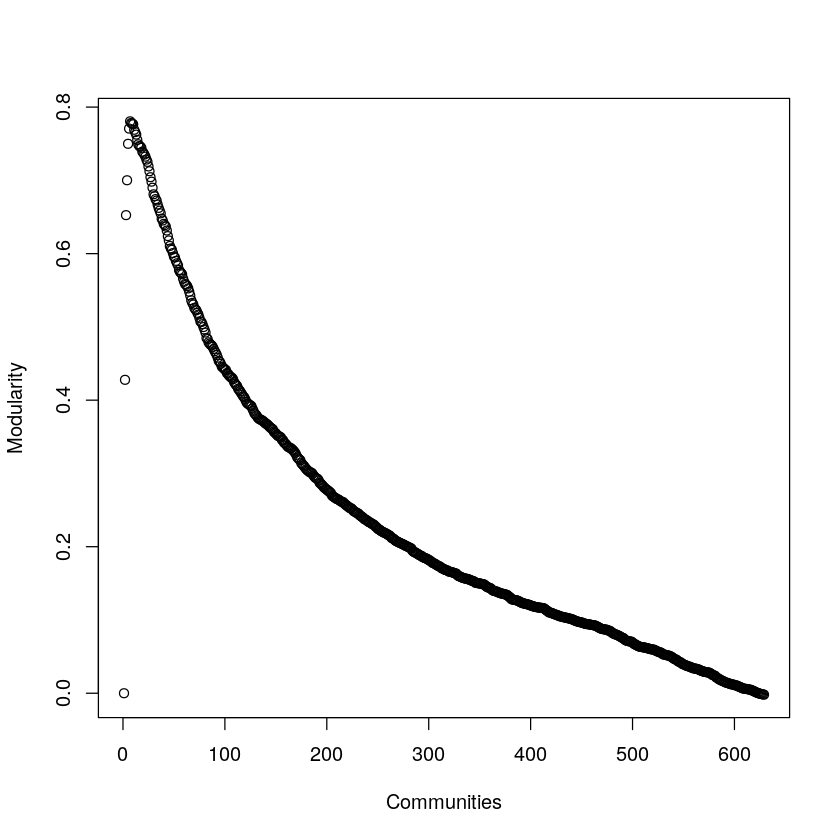

In [33]:
tree <- community.tree(net, rescale=TRUE)
plot( tree$num.of.comms, tree$modularity, xlab="Communities", ylab="Modularity" )

In [34]:

print(net$communities)

IGRAPH clustering edge betweenness, groups: 7, mod: 0.78
+ groups:
  $`1`
   [1] "V1"   "V2"   "V3"   "V4"   "V5"   "V6"   "V7"   "V8"   "V9"   "V10" 
  [11] "V11"  "V21"  "V22"  "V23"  "V24"  "V25"  "V26"  "V27"  "V28"  "V29" 
  [21] "V30"  "V31"  "V32"  "V33"  "V34"  "V35"  "V36"  "V37"  "V38"  "V39" 
  [31] "V43"  "V44"  "V45"  "V46"  "V47"  "V48"  "V49"  "V50"  "V51"  "V52" 
  [41] "V53"  "V54"  "V55"  "V56"  "V57"  "V58"  "V59"  "V60"  "V61"  "V62" 
  [51] "V63"  "V64"  "V65"  "V66"  "V77"  "V78"  "V79"  "V80"  "V90"  "V92" 
  [61] "V93"  "V94"  "V95"  "V96"  "V97"  "V98"  "V99"  "V100" "V101" "V130"
  [71] "V131" "V178" "V179" "V180" "V181" "V182" "V183" "V184" "V185" "V186"
  [81] "V187" "V188" "V189" "V190" "V191" "V192" "V193" "V194" "V195"
  + ... omitted several groups/vertices


Obtaining layout from PDB structure
Obtaining layout from PDB structure


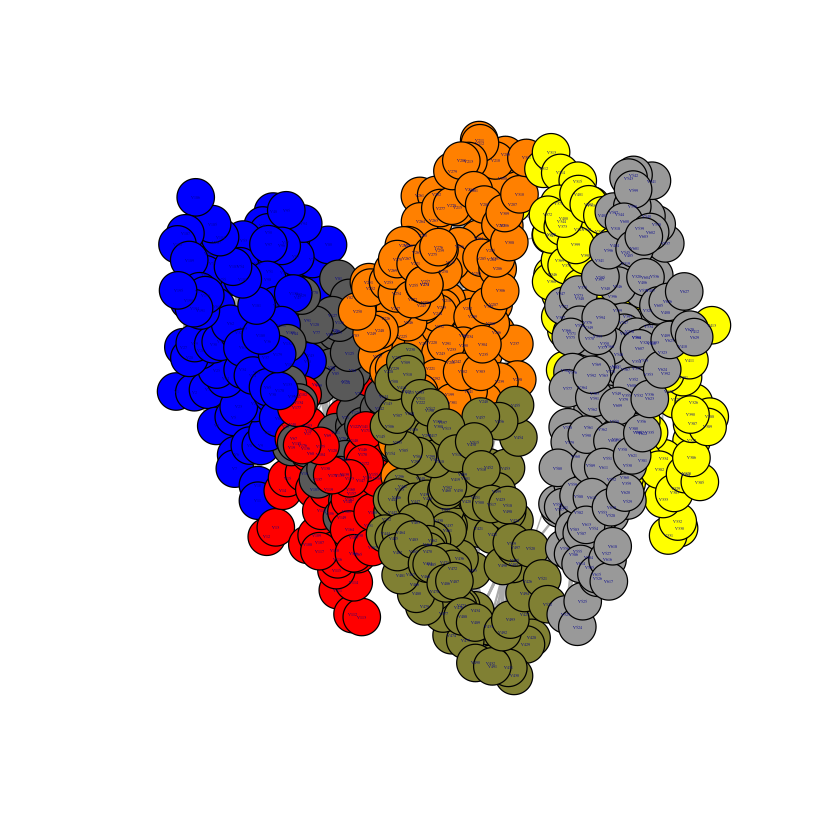

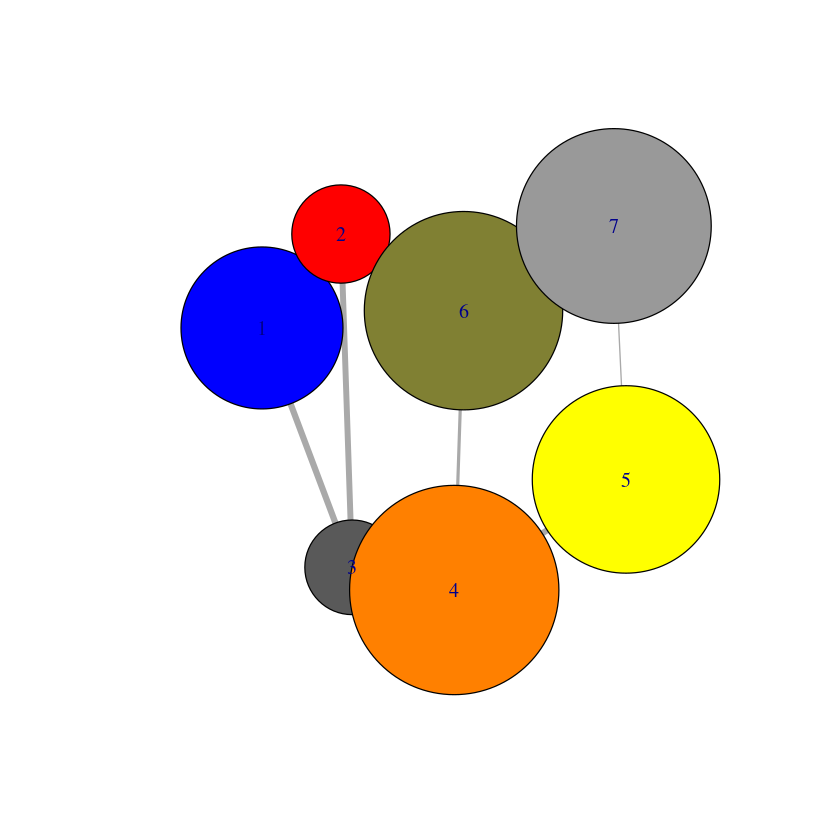

In [35]:
# Plot both the ‘full’ all-residue network and simplified community network
plot(net, pdb, full = TRUE, vertex.label.cex=0.2)
plot(net, pdb)


In [42]:
vmd(net, trim.pdb(pdb, atom.select(pdb,"calpha")), launch=TRUE )

Warning message in plot.window(...):
“"margin.segments" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"margin.segments" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"margin.segments" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"margin.segments" is not a graphical parameter”
Warning message in box(...):
“"margin.segments" is not a graphical parameter”
Warning message in title(...):
“"margin.segments" is not a graphical parameter”


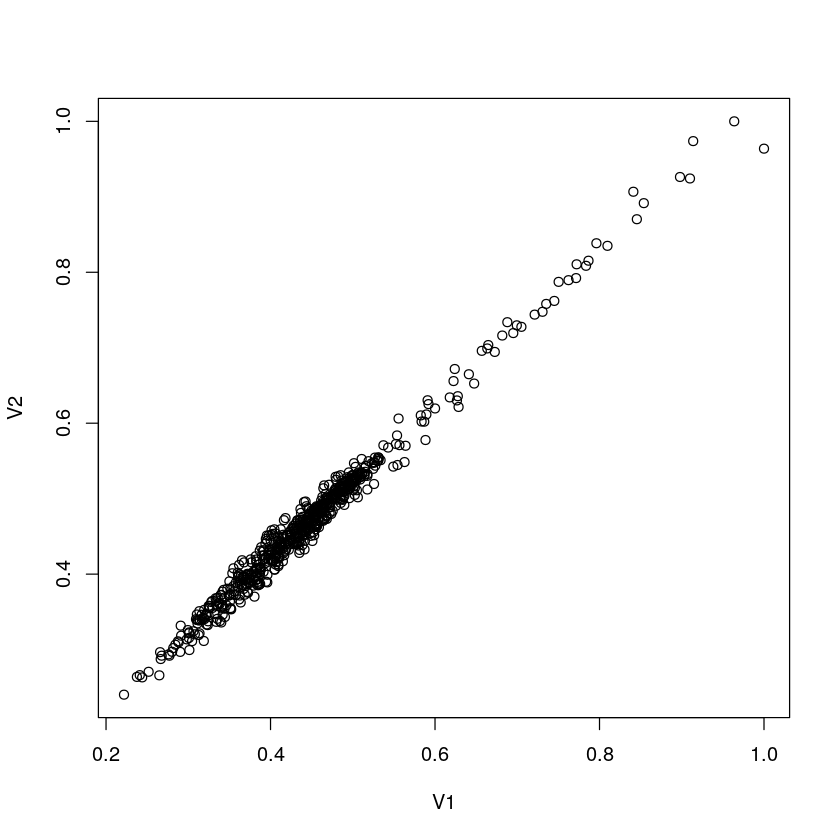

In [16]:
# Plot the correlation matrix with community annotation, see Figure 4. 
plot(cij, margin.segments = net$communities$membership, main="")

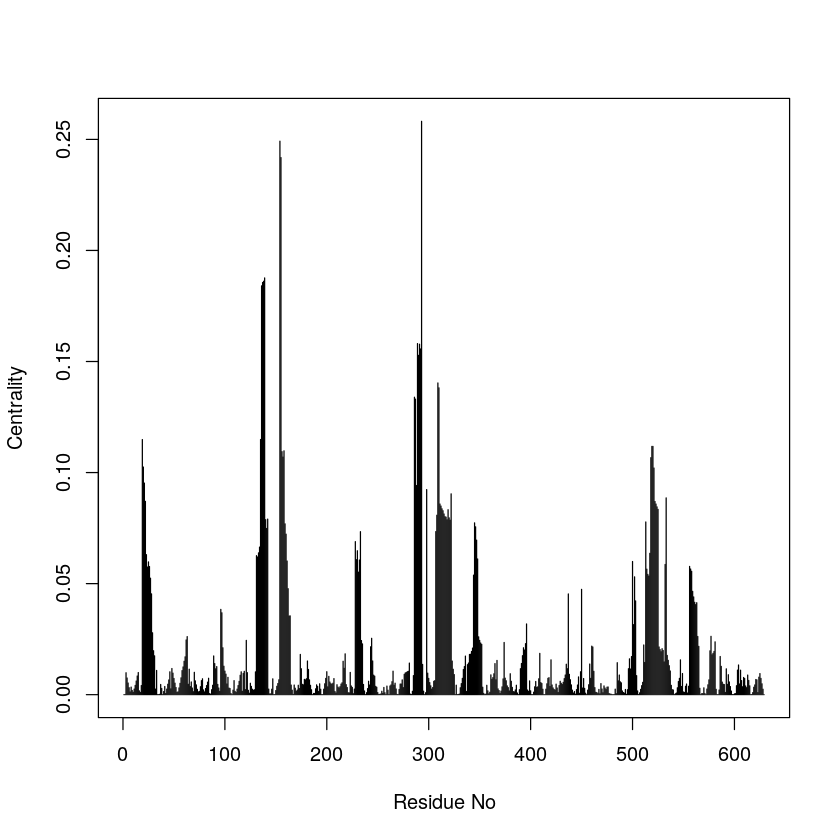

In [36]:
node.betweenness <- betweenness(net$network)
# See Figure 18. 
plot(normalize.vector(node.betweenness), xlab="Residue No", ylab="Centrality", type="h")


In [37]:
write.table(node.betweenness, file="centrality.txt", row.names=FALSE, col.names=FALSE)

In [38]:
# Output a PDB file with normalized betweenness mapped to B-factor 
write.pdb(pdb, b=normalize.vector(node.betweenness), file="tmp.pdb")


ERROR: Error in write.pdb(pdb, b = normalize.vector(node.betweenness), file = "tmp.pdb"): write.pdb: the lengths of all input vectors != 'length(xyz)/3'.
